In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import torch


class LLRegression:
    def __init__(self, num_samples, num_phi, phi_dim=1):
        self.weights = torch.ones((num_samples + 1, phi_dim), dtype=torch.double)
        self.steps = 10000
        self.lr = 0.001


    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.weights = np.zeros(self.n_features)   
        self.losses = []
        X = self.samples.broadcast_to((self.num_phi, self.num_samples)) - self.sample_phi
        self.X = torch.cat([torch.ones((X.shape[0], 1)), X], dim=1)
        
        for _ in range(self.steps):
            pred_phi = self.X.matmul(self.weights)
            # print(self.weights)
            self.losses.append(self._loss_(pred_phi)[0])
            self.weights = self.weights - self.delta * self._grad_(self.X, pred_phi)
        
        return self.weights

    def _grad_(self, X, pred):
        # print(X.T,  self.phi, (self.phi - X @ weights), X.T @ (self.phi - X @ weights), sep="\n")
        # print(X.T.shape, self.phi.shape, pred.shape)
        return -2 * X.T.matmul(self.phi - pred) 
        

    def _loss_(self, pred_phi):
        return sum((self.phi - pred_phi)**2)

    def __call__(self, x):
        return x.dot(self.weights)


num_samples = 10
num_phi = 3
phi_dim = 1

model = LLRegression(num_samples=num_samples, num_phi=num_phi, phi_dim=phi_dim)
samples = torch.rand(dtype=torch.double, size=(1, num_samples))
w_true = torch.randn(dtype=torch.double, size=(num_samples, phi_dim))
phi = samples.matmul(w_true) + torch.randn(dtype=torch.double, size=(1, phi_dim)) 
sample_phi = torch.rand(dtype=torch.double, size=(num_phi, num_samples))

# print(phi)
weights = model.fit(samples, sample_phi, phi)
# plt.plot(model.losses[-100:])
print(model(phi))


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1 and 11x1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import torch



class LLRegression:
    def __init__(self, n_iters, learning_rate, kernel=None):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.K = kernel
    
    
    def fit(self, S, p, cond_samples):
        """
        S - вся выборка саммари статистик, тензор (n_samples, n_sample_dim)
        p - \phi_i из пар (\phi_i, s_i) из joint distribution, тензор (n_cond_samples, n_phi_dim)
        cond_samples - s_i из пар (\phi_i, s_i) из joint distribution, тензор (n_cond_samples, n_sample_dim)
        """
        self.n_samples, self.n_sample_dim = S.shape
        self.n_cond_samples, self.n_phi_dim = p.shape
        self.X = torch.ones((self.n_samples + 1, self.n_cond_samples, self.n_sample_dim), dtype=torch.float)
        for i in range(self.n_samples):
            for j in range(self.n_cond_samples):
                self.X[i, j] = cond_samples[i, j] - S[i]
        print(self.X)

model = LLRegression(1000, 0.001)


In [ ]:
num_samples = 4
num_phi = 3
phi_dim = 1

beta = torch.ones((num_samples + 1, phi_dim), dtype=torch.double)
alpha = torch.ones((1, phi_dim), dtype=torch.double)
samples = torch.rand(dtype=torch.double, size=(1, num_samples))
sample_phi = torch.rand(dtype=torch.double, size=(num_phi, num_samples))
# print(beta, alpha, samples)
X = samples.broadcast_to((num_samples, num_phi)) - sample_phi
X = torch.cat([torch.ones((X.shape[0], 1)), X], dim=1)
print(X)
# print(X - sample_phi, sep="\n")
# phi = beta[-1] + X@beta[:-1] #+ torch.rand(size=(1, phi_dim), dtype=torch.double)
# print(alpha, beta, samples, sample_phi, X, phi, sep='\n')
samples.expand((num_phi, -1)), X

tensor([[ 1.0000,  0.2901, -0.7096, -0.0255, -0.6230],
        [ 1.0000,  0.1928, -0.4136,  0.3988, -0.6752],
        [ 1.0000,  0.5202, -0.3111,  0.0586, -0.2098]], dtype=torch.float64)


(tensor([[0.7938, 0.1882, 0.8121, 0.0457],
         [0.7938, 0.1882, 0.8121, 0.0457],
         [0.7938, 0.1882, 0.8121, 0.0457]], dtype=torch.float64),
 tensor([[ 1.0000,  0.2901, -0.7096, -0.0255, -0.6230],
         [ 1.0000,  0.1928, -0.4136,  0.3988, -0.6752],
         [ 1.0000,  0.5202, -0.3111,  0.0586, -0.2098]], dtype=torch.float64))

In [ ]:
samples = torch.rand(dtype=torch.double, size=(1, num_samples))


[-0.20738624] [0.20738624]


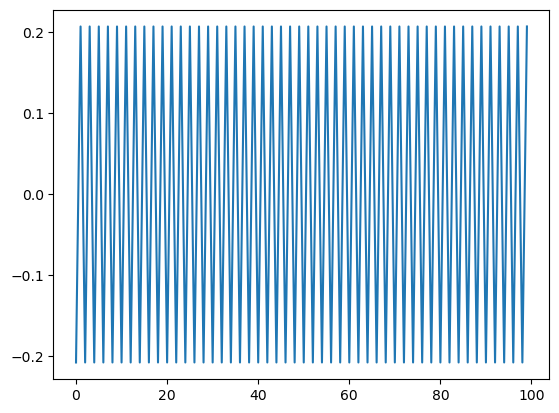

In [ ]:
f = lambda x: x**2 - 1
df = lambda x: 2 * x
alpha = 1
steps = 100

x = np.zeros((steps, 1), dtype=np.float32)
x[0] = np.random.randn()
for i in range(1, steps):
    x[i] = x[i - 1] - alpha * df(x[i - 1])
print(x[0], x[-1])
plt.plot(x)
plt.show()

In [58]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # Инициализация параметров
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Градиентный спуск
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Вычисление градиентов
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


# Генерация синтетических данных
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression(learning_rate=0.01, n_iters=1000)
model.fit(X_train, y_train)

# Предсказание
predictions = model.predict(X_test)

# Оценка модели (среднеквадратичная ошибка)
mse = np.mean((predictions - y_test) ** 2)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.01
